In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

In [ ]:
https://github.com/Noahbisht0/chestXray-dataset.git

In [ ]:
train_df = pd.read_csv("nih/train-small.csv")

In [ ]:
train_df.head()

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [ ]:
class_counts = train_df.sum().drop(['Image','PatientId'])

In [ ]:
class_counts

Atelectasis           106
Cardiomegaly           20
Consolidation          33
Edema                  16
Effusion              128
Emphysema              13
Fibrosis               14
Hernia                  2
Infiltration          175
Mass                   45
Nodule                 54
Pleural_Thickening     21
Pneumonia              10
Pneumothorax           38
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


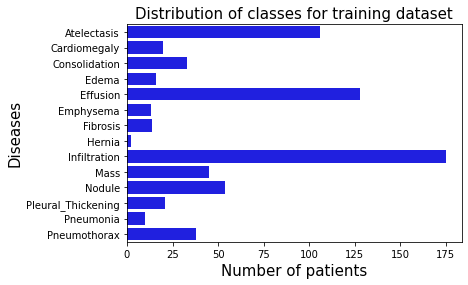

In [ ]:
sns.barplot(class_counts.values,class_counts.index,color="b")
plt.title("Distribution of classes for training dataset",fontsize=15)
plt.xlabel("Number of patients",fontsize=15)
plt.ylabel("Diseases",fontsize=15)
plt.show()

In [ ]:
class_counts.index

Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [ ]:
y_true = np.array([[1],[1],[1],[0]])
print(y_true)

[[1]
 [1]
 [1]
 [0]]


In [ ]:
y_pred_1 = 0.9 * np.ones(y_true.shape)
print(y_pred_1)
y_pred_2 = 0.1 * np.ones(y_true.shape)
print(y_pred_2)

[[0.9]
 [0.9]
 [0.9]
 [0.9]]
[[0.1]
 [0.1]
 [0.1]
 [0.1]]


In [ ]:
loss_reg_1 = -1 * np.sum(y_true * np.log(y_pred_1)) + -1 * np.sum((1 - y_true) * np.log(1 - y_pred_1))
print(f"loss for first model: {loss_reg_1:.4f}")

loss for first model: 2.6187


In [ ]:
loss_reg_2 = -1 * np.sum(y_true * np.log(y_pred_2)) + -1 * np.sum((1 - y_true) * np.log(1 - y_pred_2))
print(f"loss for first model: {loss_reg_2:.4f}")

loss for first model: 7.0131


In [ ]:
w_p = 1/4
w_n = 3/4

In [ ]:
loss_1_pos = -1 * np.sum(w_p * y_true * np.log(y_pred_1))
print(f"loss_1: {loss_1_pos:.4f}")
loss_1_neg = -1 * np.sum(w_n * (1 - y_true) * np.log(1 - y_pred_1))
print(f"loss_1: {loss_1_neg:.4f}")

loss_1: 0.0790
loss_1: 1.7269


In [ ]:
loss_1 = loss_1_pos + loss_1_neg
print(f"{loss_1:.4f}")

1.8060


In [ ]:
loss_2_pos = -1 * np.sum(w_p * y_true * np.log(y_pred_2))
print(f"loss_2: {loss_2_pos:.4f}")
loss_2_neg = -1 * np.sum(w_n * (1 - y_true) * np.log(1 - y_pred_2))
print(f"loss_2: {loss_2_neg:.4f}")

loss_2: 1.7269
loss_2: 0.0790


In [ ]:
loss_2 = loss_2_pos + loss_2_neg
print(f"{loss_2:.4f}")

1.8060


In [ ]:
print(f"When the model always predicts 0.9, the total loss is {loss_1:.4f}")
print(f"When the model always predicts 0.1, the total loss is {loss_2:.4f}")

When the model always predicts 0.9, the total loss is 1.8060
When the model always predicts 0.1, the total loss is 1.8060


In [ ]:
y_true = np.array(
        [[1,0],
         [1,0],
         [1,0],
         [1,0],
         [0,1]
        ])
y_true

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]])

In [ ]:
print(f"using axis = 0 {np.sum(y_true,axis=0)}")
print(f"using axis = 1 {np.sum(y_true,axis=1)}")

using axis = 0 [4 1]
using axis = 1 [1 1 1 1 1]


In [ ]:
w_p = np.sum(y_true == 0,axis=0) / y_true.shape[0]
w_p

array([0.2, 0.8])

In [ ]:
w_n = np.sum(y_true == 1,axis=0) / y_true.shape[0]
w_n

array([0.8, 0.2])

In [ ]:
y_pred = np.ones(y_true.shape)
y_pred[:,0] = 0.3 * y_pred[:,0]
y_pred[:,1] = 0.7 * y_pred[:,1]
y_pred

array([[0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7]])

In [ ]:
loss_0_pos = -1 * np.sum(w_p[0] * y_true[:,0] * np.log(y_pred[:,0]))
print(f"loss_0_pos:{loss_0_pos:.4f}")

loss_0_pos:0.9632


In [ ]:
loss_0_neg = -1 * np.sum(w_n[0] * (1 - y_true[:,0]) * np.log(1 - y_pred[:,0]))
print(f"loss_0_neg:{loss_0_neg:.4f}")

loss_0_neg:0.2853


In [ ]:
loss_0 = loss_0_neg + loss_0_pos
print(f"loss_0: {loss_0:.4f}")

loss_0: 1.2485


In [ ]:
loss_1_pos = -1 * np.sum(w_p[1] * y_true[:,1] * np.log(y_pred[:,1]))
print(f"loss_0_pos:{loss_1_pos:.4f}")

loss_0_pos:0.2853


In [ ]:
loss_1_neg = -1 * np.sum(w_n[1] * (1-y_true[:,1]) * np.log(1- y_pred[:,1]))
print(f"loss_0_neg:{loss_1_neg:.4f}")

loss_0_neg:0.9632


In [ ]:
loss_1 = loss_1_neg + loss_1_pos
print(f"loss_1: {loss_1:.4f}")

loss_1: 1.2485
